In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

In [14]:
#Standardscalar
from sklearn.preprocessing import StandardScaler
data1 = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]

scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data1)
print(scaled)

[[ 1.0687974  -0.34455075 -0.1016875  ...  0.47266646  0.04330173
   1.8103605 ]
 [ 0.93332887  0.14061552 -0.14118477 ...  0.39705125  0.73487256
   2.24205791]
 [ 0.25598625  0.04964684 -0.08193887 ...  0.48695381  1.77151047
   2.92106603]
 ...
 [ 1.82742114 -0.61745677 -0.35841972 ... -0.19123516 -0.13812031
   1.27141766]
 [ 1.80032743 -0.64777967 -0.27942519 ... -0.86951801  0.37390383
   0.43154519]
 [ 1.44810927 -1.07230015 -0.35841972 ... -0.49802006  0.40109573
   0.68200518]]


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,target,test_size = 0.2,random_state =2)

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

params_mlp = {'solver' : ['lbfgs','sgd','adam'],
          'activation':['identity', 'logistic','tanh','relu'],
            'learning_rate' : ['constant','invscaling','adaptive'] }
gs_mlp = GridSearchCV(MLPClassifier(), params_mlp, verbose=1, cv=3)
g_res_mlp= gs_mlp.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.7min finished


In [17]:
g_res_mlp.best_score_

0.9812528950158246

In [18]:
g_res_mlp.best_params_

{'activation': 'tanh', 'learning_rate': 'invscaling', 'solver': 'lbfgs'}

In [19]:
mlp = MLPClassifier( solver='lbfgs',activation='tanh',learning_rate= 'invscaling')
mlp.fit(x_train,y_train)

MLPClassifier(activation='tanh', learning_rate='invscaling', solver='lbfgs')

In [20]:
# Training & Testing accuracy after applying hyper parameter
mlp_train_accuracy = mlp.score(x_train,y_train)
print("mlp_train_accuracy = ",mlp.score(x_train,y_train))
#Print Test Accuracy
mlp_test_accuracy = mlp.score(x_test,y_test)
print("mlp_test_accuracy = ",mlp.score(x_test,y_test))

mlp_train_accuracy =  1.0
mlp_test_accuracy =  0.9840909090909091


In [22]:
acc = []
model = []

In [23]:
from sklearn.metrics import classification_report
from sklearn import metrics

predicted_values = mlp.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values);
acc.append(x)
model.append('MLPClassifier')
print("MLPClassifier Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

MLPClassifier Accuracy is:  0.9840909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       0.97      1.00 

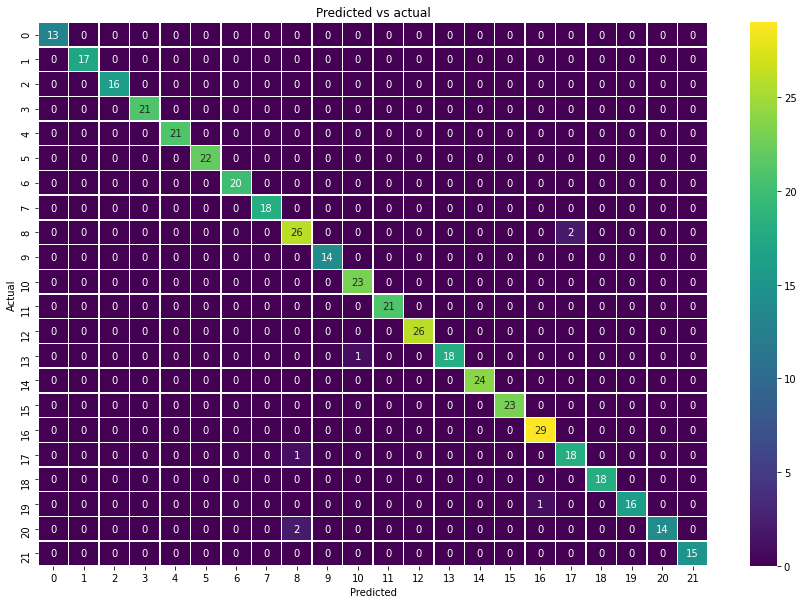

In [24]:
y_pred = mlp.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_mlp = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_mlp, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()